# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_unit=10, num_neurons=[128, 64, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, p in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=p, activation='relu', name='hidden'+str(i))(input_layer)
        else:
            x = keras.layers.Dense(units=p, activation='relu', name='hidden'+str(i))(x)
    
    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
opts = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]
# sgd = optimizers.SGD(lr=0.01, nesterov=True, momentum=0.95)
# RMSprop = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
# keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
kargs = [
    {'nesterov': True, 'momentum': 0.95},
    {'rho': 0.9, 'decay': 0.0},
    {'decay': 0.0},
    {'beta_1': 0.9, 'decay': 0.0, 'amsgrad': False},
]
LEARNING_RATE = [0.01, 0.001]
EPOCHS = 30
BATCH_SIZE = 256

In [18]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt, karg in zip(opts, kargs):
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with lr {} and optimizer {}'.format(lr, opt.__name__))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        karg.update({'lr': lr})
        print(karg)
        optimizer = opt(**karg)

        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = 'exp-lr-{}-optimizer-{}'.format(lr, opt.__name__)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr 0.01 and optimizer SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden0 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden1 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden2 (Dense)              (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 411,210
Trainable params: 411,210
Non-trainable params: 0
_________________________________________________________________
{'nesterov': True, 'momentum': 0.95, 'lr': 0.01}
Train on 50000 samples, validate on 10000 sam

50000/50000 [==============================] - 10s 191us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 9s 189us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 9s 190us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/5000

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 217us/step - loss: 2.9360 - acc: 0.2495 - val_loss: 1.9723 - val_acc: 0.3010
Epoch 2/30
50000/50000 [==============================] - 10s 203us/step - loss: 1.8195 - acc: 0.3406 - val_loss: 1.8697 - val_acc: 0.3216
Epoch 3/30
50000/50000 [==============================] - 10s 203us/step - loss: 1.7868 - acc: 0.3533 - val_loss: 1.8193 - val_acc: 0.3386
Epoch 4/30
50000/50000 [==============================] - 11s 220us/step - loss: 1.7504 - acc: 0.3691 - val_loss: 1.7468 - val_acc: 0.3652
Epoch 5/30
50000/50000 [==============================] - 10s 207us/step - loss: 1.7432 - acc: 0.3703 - val_loss: 1.7726 - val_acc: 0.3697
Epoch 6/30
50000/50000 [==============================] - 11s 217us/step - loss: 1.7366 - acc: 0.3731 - val_loss: 1.7542 - val_acc: 0.3643
Epoch 7/30
50000/50000 [==============================] - 10s 198us/step - loss: 1.7192 - acc: 0.3818 - val_loss: 1.

Epoch 21/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.3490 - acc: 0.5223 - val_loss: 1.4631 - val_acc: 0.4799
Epoch 22/30
50000/50000 [==============================] - 9s 176us/step - loss: 1.3372 - acc: 0.5252 - val_loss: 1.4683 - val_acc: 0.4808
Epoch 23/30
50000/50000 [==============================] - 9s 178us/step - loss: 1.3249 - acc: 0.5310 - val_loss: 1.4855 - val_acc: 0.4713
Epoch 24/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.3144 - acc: 0.5332 - val_loss: 1.4290 - val_acc: 0.4948
Epoch 25/30
50000/50000 [==============================] - 9s 175us/step - loss: 1.3038 - acc: 0.5371 - val_loss: 1.4173 - val_acc: 0.4902
Epoch 26/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.2940 - acc: 0.5413 - val_loss: 1.3861 - val_acc: 0.5058
Epoch 27/30
50000/50000 [==============================] - 9s 180us/step - loss: 1.2828 - acc: 0.5449 - val_loss: 1.3949 - val_acc: 0.5035
Epoch 28/30
50000/50000 [==

Epoch 4/30
50000/50000 [==============================] - 9s 190us/step - loss: 1.7764 - acc: 0.3750 - val_loss: 1.7718 - val_acc: 0.3745
Epoch 5/30
50000/50000 [==============================] - 9s 184us/step - loss: 1.7508 - acc: 0.3828 - val_loss: 1.7472 - val_acc: 0.3834
Epoch 6/30
50000/50000 [==============================] - 9s 182us/step - loss: 1.7287 - acc: 0.3943 - val_loss: 1.7303 - val_acc: 0.3928
Epoch 7/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.7097 - acc: 0.3990 - val_loss: 1.7171 - val_acc: 0.3985
Epoch 8/30
50000/50000 [==============================] - 9s 182us/step - loss: 1.6915 - acc: 0.4074 - val_loss: 1.7025 - val_acc: 0.3970
Epoch 9/30
50000/50000 [==============================] - 9s 183us/step - loss: 1.6765 - acc: 0.4121 - val_loss: 1.6806 - val_acc: 0.4072
Epoch 10/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.6634 - acc: 0.4162 - val_loss: 1.6666 - val_acc: 0.4161
Epoch 11/30
50000/50000 [========

Epoch 25/30
50000/50000 [==============================] - 6s 112us/step - loss: 1.2488 - acc: 0.5544 - val_loss: 1.4196 - val_acc: 0.4949
Epoch 26/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.2321 - acc: 0.5623 - val_loss: 1.4213 - val_acc: 0.4922
Epoch 27/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.2341 - acc: 0.5605 - val_loss: 1.3939 - val_acc: 0.5069
Epoch 28/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.2169 - acc: 0.5645 - val_loss: 1.4163 - val_acc: 0.5110
Epoch 29/30
50000/50000 [==============================] - 5s 109us/step - loss: 1.2222 - acc: 0.5646 - val_loss: 1.3907 - val_acc: 0.5106
Epoch 30/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.2087 - acc: 0.5692 - val_loss: 1.4220 - val_acc: 0.4989


8


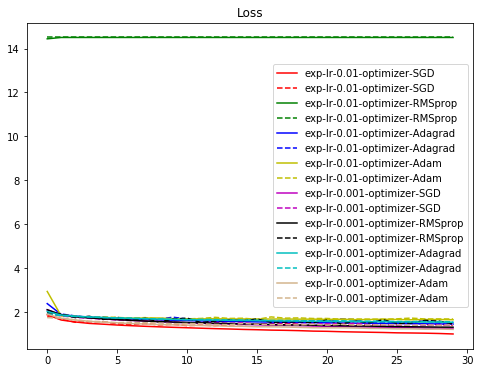

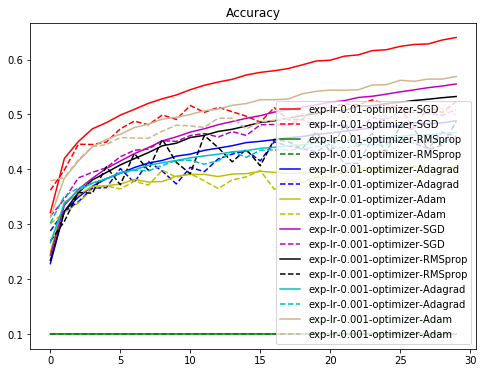

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
print(len(results))
color_bar = ["r", "g", "b", "y", "m", "k", 'c', 'tan']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
學習率很小的時候Adam比起其他的optimizer收斂的快，學習率很大的時候SGD表現比較好，
Adagrad隨著epoch次數越多到後面收斂的有點變慢了，Adam似乎有點因為步伐太大導致準確率跳來跳去